Caio Teles Cunha - 2020006434

Ivan Vilaça de Assis - 2021421931

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def plotRandomWalks1D(walkCumSum,N): 
  t = np.arange(0, (N+1))
  plt.plot(t, walkCumSum)
  plt.title('Caminhadas aleatória 1D')
  plt.xlabel('Posição')
  plt.ylabel('Passos')
  plt.show()

In [10]:
def genRandomWalks1D(N):  
  
  walk = np.random.uniform(low=-0.5, high=0.5, size=(N,))

  # A caminhada começa do 0
  walk = np.insert(walk, 0, 0, axis=0)
  walkCumSum = np.cumsum(walk)

  return walkCumSum

Fazendo 3 caminhadas em 1 dimensão com N = 10000.

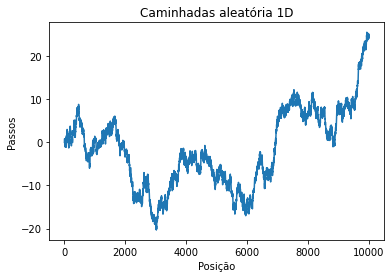

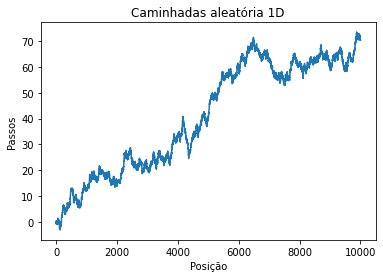

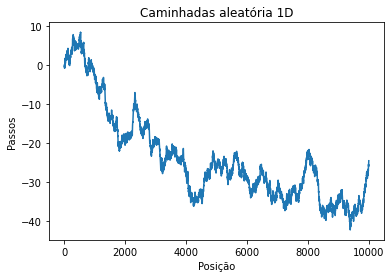

In [11]:
for i in range(0,3):
  cumSum = genRandomWalks1D(10000)
  plotRandomWalks1D(cumSum, 10000)

In [12]:
def genRandomWalks2D(N): 
  walkX = np.random.uniform(low=-0.5, high=0.5, size=(N,))
  walkY = np.random.uniform(low=-0.5, high=0.5, size=(N,))
  
  # A caminhada começa do 0
  walkX = np.insert(walkX, 0, 0, axis=0)
  walkY = np.insert(walkY, 0, 0, axis=0)
  walkCumSumX = np.cumsum(walkX)
  walkCumSumY = np.cumsum(walkY)

  return walkCumSumX, walkCumSumY

In [33]:
def plotRandomWalks2D(walkCumSumX, walkCumSumY):
  plt.plot(walkCumSumX, walkCumSumY)
  plt.plot(walkCumSumX[-1], walkCumSumY[-1], marker='o', markersize=4, color='red', label='Distância final')
  plt.xlabel('Caminhadas em X')
  plt.ylabel('Caminhadas em Y')
  plt.legend()

Gerando 3 caminhadas aleatórias em 2 dimensões para 3 quantidades de passos diferentes: 10, 100, 10000

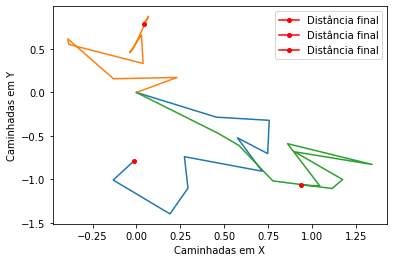

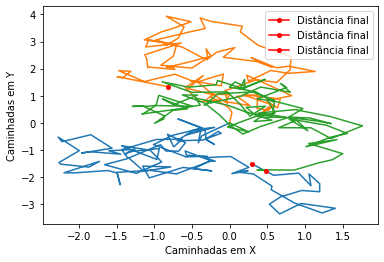

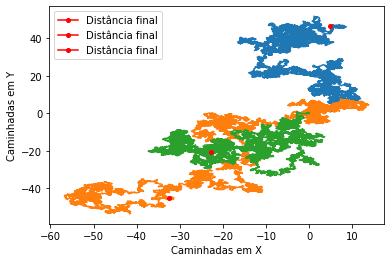

In [34]:
for i in [10,100,10000]:
  for j in range(0,3):
    walkCumSumX, walkCumSumY = genRandomWalks2D(i)
    plotRandomWalks2D(walkCumSumX, walkCumSumY)
  plt.show()

Como visto nos gráficos acima, multiplicar o **N** por um fator de 100 não faz com que a distância final de **N** e **100N** seja de 10 vezes.
 
Como as caminhadas são geradas aleatoriamente para N, obtemos resultados sem essa relação de **100xN**. Sendo possível que a distância final de **N** e **100N** diminua ou aumente em um fator aleatório.

In [52]:
def ensembleRandomWalks2D(W):
    X_1_FinalCoord = np.zeros(W)
    Y_1_FinalCoord = np.zeros(W)

    X_10_FinalCoord = np.zeros(W)
    Y_10_FinalCoord = np.zeros(W)

    for n in range(W):
      walkCumSumX, walkCumSumY = genRandomWalks2D(1)
      X_1_FinalCoord [n] = walkCumSumX[-1]
      Y_1_FinalCoord [n] = walkCumSumY[-1]

      walkCumSumX2, walkCumSumY2 = genRandomWalks2D(10)
      X_10_FinalCoord [n] = walkCumSumX2[-1]
      Y_10_FinalCoord [n] = walkCumSumY2[-1]

    plt.scatter(X_10_FinalCoord, Y_10_FinalCoord, s=5, label='N = 10')
    plt.scatter(X_1_FinalCoord, Y_1_FinalCoord,s=5, label='N = 1')
   

    plt.xlabel('Coordenadas X finais')
    plt.ylabel('Coordenadas Y finais')
    plt.legend()
    plt.show()

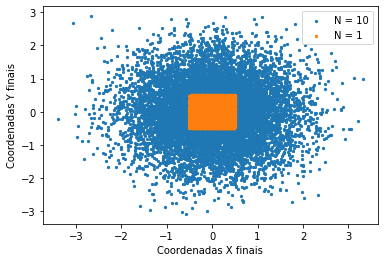

In [53]:
ensembleRandomWalks2D(10000)

In [62]:
def ensembleRandomWalks1D(W,N):
    finalCoord = np.zeros(W)

    for i in range(0,W):
        cumSum = genRandomWalks1D(N)
        finalCoord[i] = cumSum[-1]
    
    rootMeanSquare = np.sqrt(np.mean(finalCoord ** 2))
    sigma = np.sqrt(N) * rootMeanSquare

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax1.set_title('Pontos finais de {} caminhadas aleatórias\n com {} passos'.format(W,N))
    ax1.hist(finalCoord, bins=50)
    ax1.set_xlabel('Pontos finais')

    x = np.linspace((-3 * sigma),(3 * sigma), 200)
    px = (1 / np.sqrt(2 * np.pi * sigma)) * (np.exp(-(x ** 2 / 2 * sigma)))

    # Usando Latex para gerar a equação
    title = r'$p(x) = \frac{1}{{\sqrt{2 \pi \sigma}}} \cdot e^{-\frac{x^2}{2 \sigma}}$'
    ax2.set_title(title, fontsize=16)
    ax2.plot(x,px)
    
    plt.show()

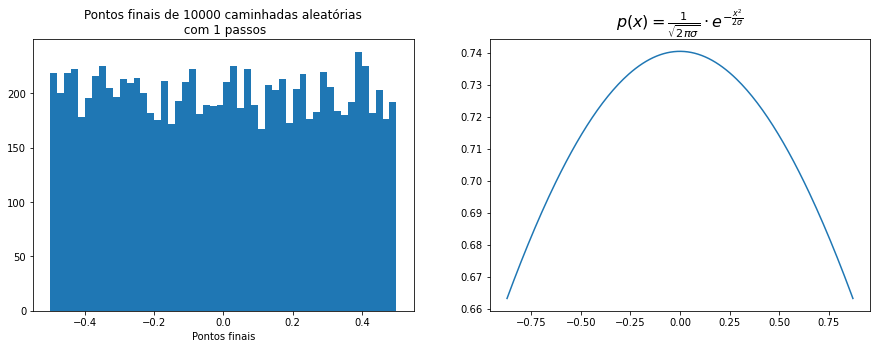

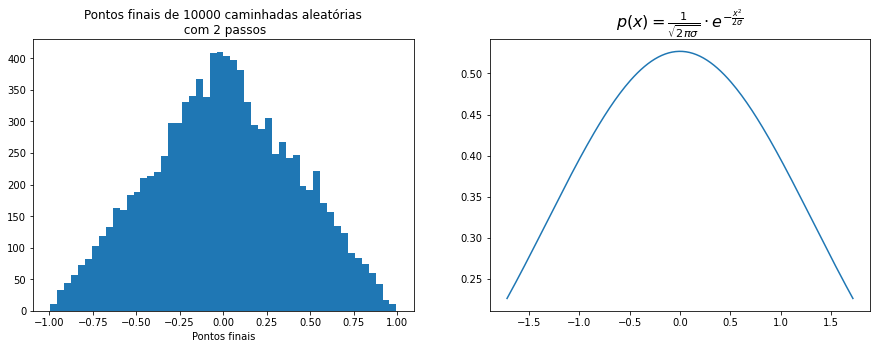

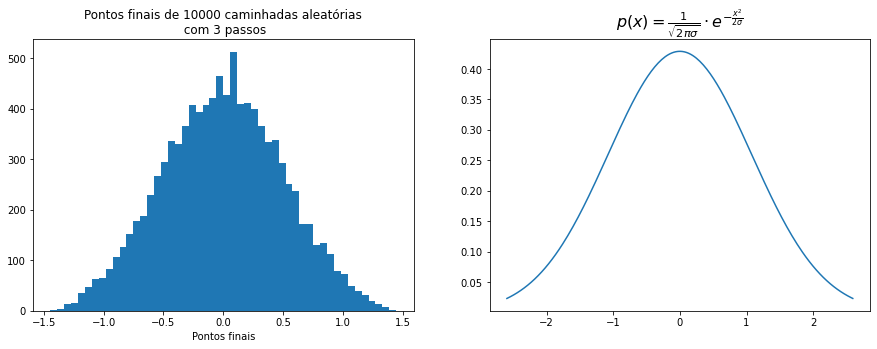

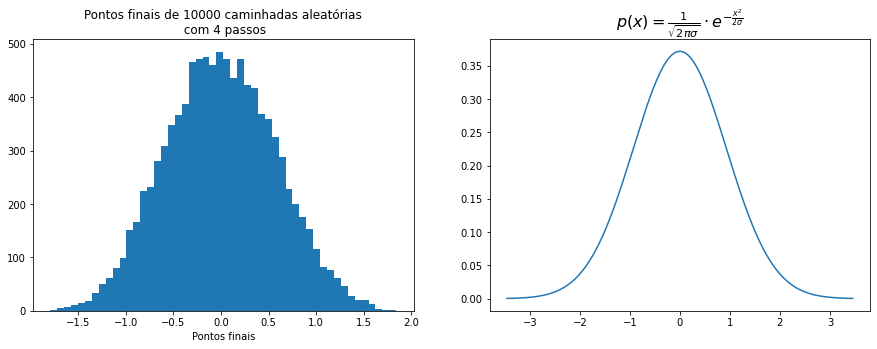

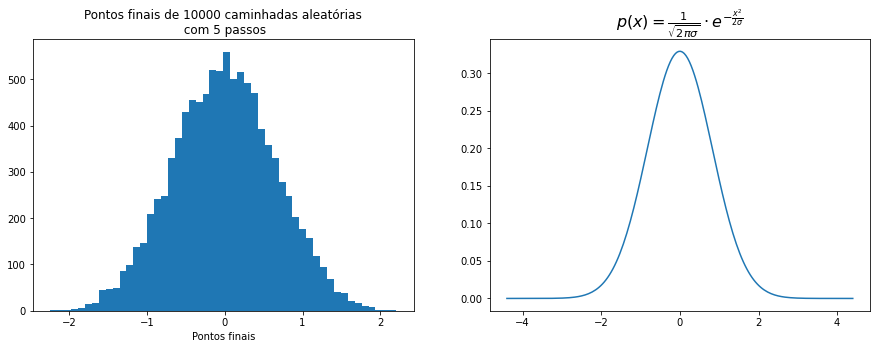

In [63]:
ensembleRandomWalks1D(10000,1)
ensembleRandomWalks1D(10000,2)
ensembleRandomWalks1D(10000,3)
ensembleRandomWalks1D(10000,4)
ensembleRandomWalks1D(10000,5)

Com valores de N menores que 3 temos algo ainda muito abstrato, mas com N = 2 já vemos algo que lembra uma distribuição normal. A partir de **N = 3** com **W = 10000** a distribuição Gaussiana ou Normal se torna uma boa aproximação para caminhada aleatória, sendo que em **N = 5** temos algo bem similar a essa distribuição. 

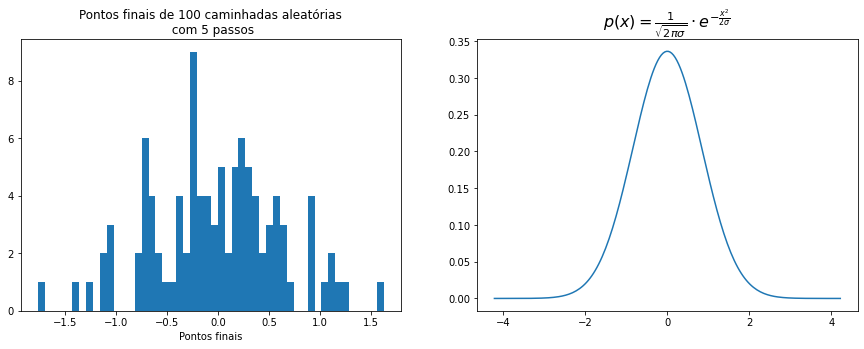

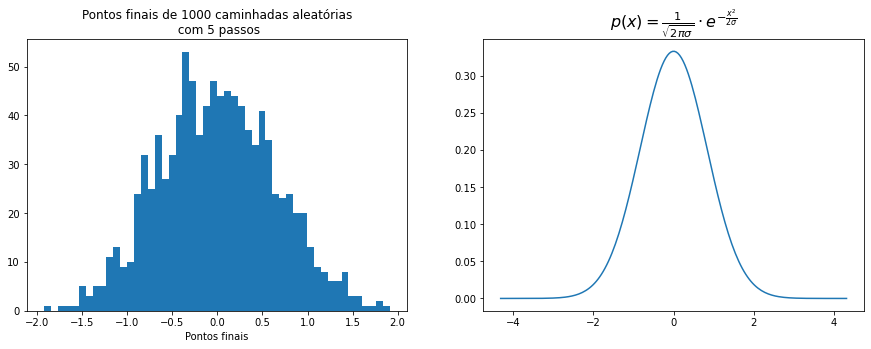

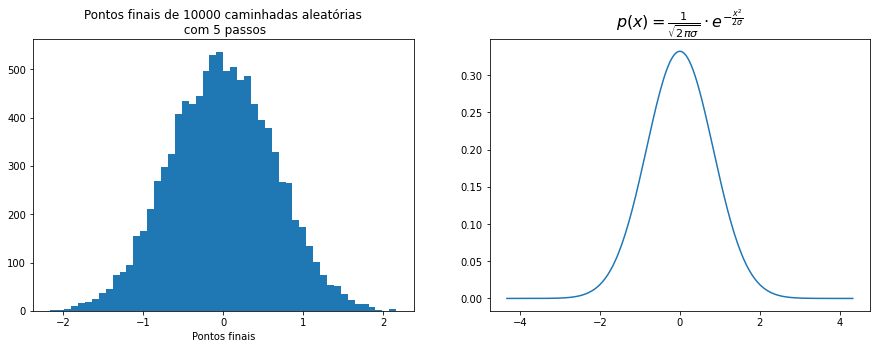

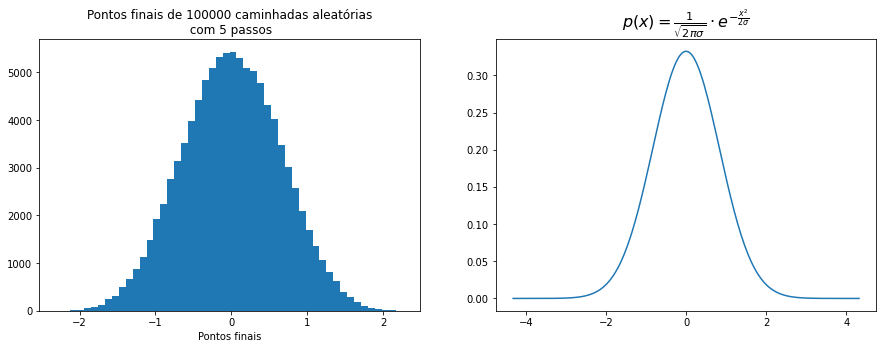

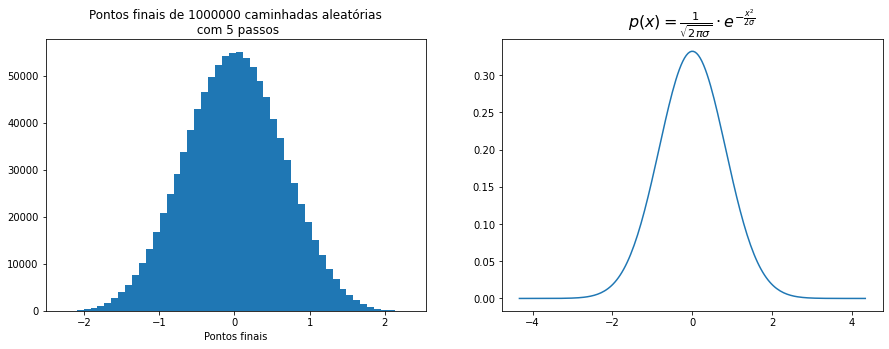

In [72]:
ensembleRandomWalks1D(100,5)
ensembleRandomWalks1D(1000,5)
ensembleRandomWalks1D(10000,5)
ensembleRandomWalks1D(100000,5)
ensembleRandomWalks1D(1000000,5)

Acima, fomos aumentando o nosso ensemble por um fator **10x** de *100 a 1000000* como *N = 5*. É notório ver como nosso histograma vai se tornando cada vez mais semelhante a uma distribuição normal o que era esperado de acordo com o teorema central do limite, levando em conta que estamos aumentando nosso ensemble.